In [ ]:
# Levels of memwebership you can use for classification
# Use likelihood for peace of mind
# last page conversion, try to look at first last page views and then conversion date 
# you can try to find how many page views it takes for convcerisons and also use this as another way of classify(interested, very curiousd...)

In [2]:
import numpy as np
from data_clean_utils import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


from bokeh.io import show
from bokeh.layouts import row, column, layout
from bokeh.models import CustomJS, DateRangeSlider, Select

In [3]:
df = pl.read_csv('data/contacts.csv')

In [4]:
# drop data that doesn't have membership value
df_member = df.drop_nulls(subset=['Membership Level'])

In [5]:
# clean all nulls
df_dropped = drop_columns_that_are_all_null(df_member,verbose=False)

In [6]:
# convert string date to dates
df_date = convert_dates(df_dropped,verbose=False)

In [7]:

relevant_cols = [ 'Membership Change Date',
 'Membership End Date',
 'Membership Join Date',
 'Membership Campaign',
 'Membership Channel',
 'Previous Membership Level',
 'Membership Level',
 'Membership Level Last Modification Date',
 'Membership Status',
 'Job Title',
 'Volunteering',
 'Persona',
 'Preferred language',
 'Average Pageviews',
 'Event Revenue',
 'First Page Seen',
 'Number of Pageviews',
 'Number of Sessions',
 'First Referring Site',
 'First Touch Converting Campaign',
 'Last Page Seen',
 'Last Referring Site',
 'Last Touch Converting Campaign',
 'Recent Conversion',
 'Recent Conversion Date',
#  'Participated in Big Survey',
 'Social Media Activist',
 'Votes Intention 2024',
 ]

In [8]:
df_pca = df_date.select(relevant_cols)
int_cols = []
for col in df_pca:
    if col.dtype == pl.Int64:
        int_cols.append(col.name)
df_pca = df_pca.select(int_cols)
df_pca

variables = df_pca.to_pandas()
target = df_date.select('Membership Level').to_numpy()
df_pca.head()

Average Pageviews,Event Revenue,Number of Pageviews,Number of Sessions
i64,i64,i64,i64
6,0,2735,427
0,0,0,0
1,0,7,6
0,0,0,1
1,0,8,6


In [9]:
x = StandardScaler().fit_transform(variables)
pca = PCA(n_components=2)

x_new = pca.fit_transform(x)
print(pca.explained_variance_ratio_)
coeff = np.transpose(pca.components_[0:2,:])

[0.73835135 0.22837193]


In [10]:
target

array([['Militant'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Militant'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Basegroup'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Militant'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Militant'],
       ['Consultative'],
       ['Consultative'],
       ['Militant'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative']

In [54]:
def myplot(score,coeff,labels=None):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 

    colors = {'Militant':'#fc4e03',
            'Consultative':'#034efc',
            'Basegroup':'#4fc95b'}

    plt_colors = [colors[i[0]] for i in target]

    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    ax.scatter(xs * scalex,ys * scaley, c = plt_colors)
    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')


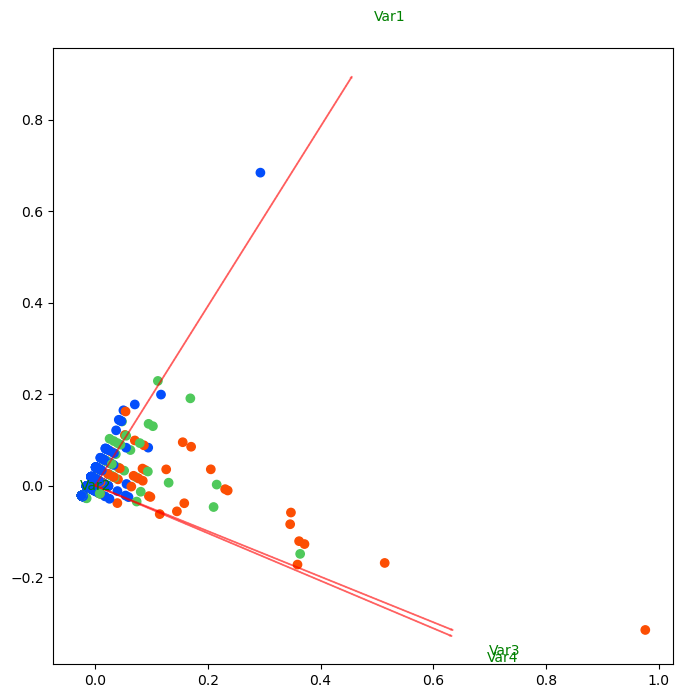

In [55]:
myplot(x_new,coeff)

In [56]:
print(abs( pca.components_ ))

[[4.53701199e-01 2.22044605e-16 6.31060823e-01 6.29219723e-01]
 [8.91110161e-01 2.77555756e-16 3.14274640e-01 3.27344056e-01]]


In [57]:
n_pcs = pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
most_important

[2, 0]

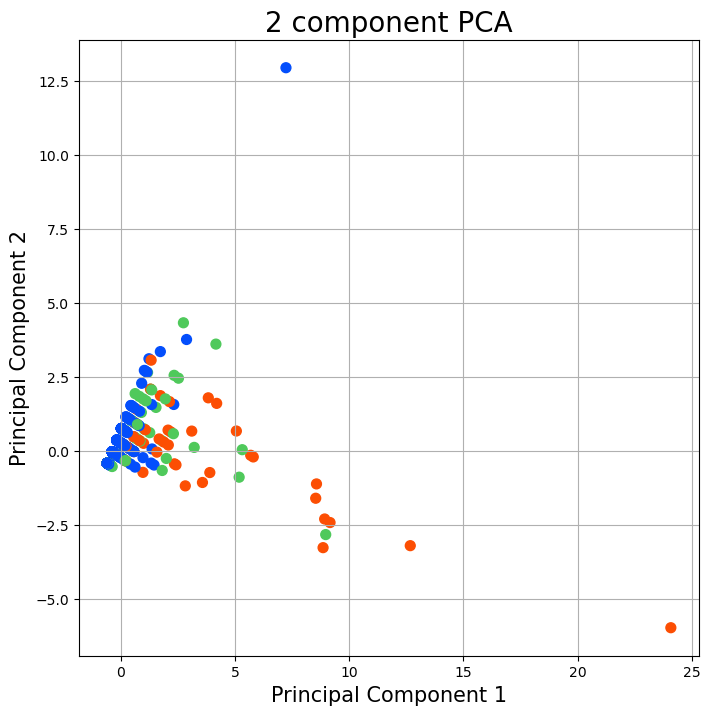

In [50]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 


colors = {'Militant':'#fc4e03',
          'Consultative':'#034efc',
          'Basegroup':'#4fc95b'}

plt_colors = [colors[i[0]] for i in target]

ax.scatter(pp[:,0],pp[:,1],
           s=50,c=plt_colors)



ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.grid()

In [38]:
target

array([['Militant'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Militant'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Basegroup'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Militant'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Militant'],
       ['Consultative'],
       ['Consultative'],
       ['Militant'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative'],
       ['Consultative']

In [ ]:
[c for c in df.columns if "Recent" in c]

In [ ]:
print(len(df))
df['Recent Conversion'].null_count()

In [ ]:
q = (df_date.group_by(["First Conversion"])
     .agg(
         [
             pl.len().alias('count')
         ]
     ).sort(['count'],descending=True))
q.write_csv('most_conversions.csv')
q

In [ ]:
from bokeh.plotting import figure,show
from bokeh.models import ColumnDataSource

f1 = figure(
    title="",
    width=600,
    height=400,
    x_axis_type="datetime",
    y_axis_type="datetime",
    x_axis_label="x",
    y_axis_label="y",
)
df_date

d = ColumnDataSource(data = {"x":df_date['Date of birth'].drop_nulls().to_list(), "y":df_date['Date of birth'].drop_nulls().to_list()})

f1.circle("x", "y", source=d)
show(f1)

In [ ]:
class States(Enum):
    A = 0
    B = 1
    C = 2

In [ ]:
States.A.name

In [ ]:
import sys

variable = 30.4987
print(sys.getsizeof(variable)) #prints 28
